# BEE 4310/6310: Environmental Statistics and Learning  <br> Assignment #3 (10 pts)

**Include responses to everything below in bold (including plots), and make sure your final assignment is well organized in a single markdown PDF submitted to Canvas. This makes it easier to grade (and easier to give partial credit).**

**Remember to include an acknowledgement at the bottom of this assignment if generative AI was used for coding support, including a list of the problems for which it was used.**

<img src="LearningOutcomes_3.png" width="1000"/>

**Techniques and Topics:** 
- Visual data exploration
- t-test in regression
- F-test in regression
- Testing assumptions of regression analysis
- Data transformations
- Prediction skill and uncertainty
- Multicollinearity
- Ridge regression
- LASSO regression
- Cross validation

**Packages and functions covered in Data Camp exercises (note: many will not be needed in the problems below)** 

| numpy as np       | Matplotlib.pyplot as plt  | pandas as pd  | scipy.stats | seaborn as sns | statsmodels.formula.api | statsmodels.api |
| -----------       | ------------------------  | ------------  | ----------- | -------------- | ----------------------- | --------------- |  
|np.array           | plt.plot                  | pd.DataFrame  | uniform.cdf | sns.scatterplot| ols                     | qqplot          |
|np.mean            | plt.show                  | pd.read_csv   | uniform.rvs | sns.lmplot     | ols.fit
|np.median          | plt.xscale                | pd.get_dummies| uniform.ppf | sns.regplot    | ols.params
|np.var             | plt.yscale                | pd.concat     | binom.cdf   | sns.displot    | ols.predict
|np.std             | plt.scatter               | df.iloc       | binom.rvs   | sns.residplot  | ols.fittedvalues
|np.quantile        | plt.hist                  | df.loc        | binom.ppf   |                | ols.resid
|np.random.rand     | plt.clf                   | df.apply      | norm.cdf    |                | ols.rsquared
|np.random.randint  | plt.xlabel                | df.iterrows   | norm.rvs    |                | ols.mse_resid
|np.random.seed     | plt.tlabel                | df.sample     | norm.ppf    |                | ols.summary
|np.logical_or      | plt.title                 | df.assign     | poisson.cdf |                | ols.get_influence().resid_studentized_internal
|np.logical_and     | plt.xticks                | df.drop       | poisson.rvs |                | ols.get_influence().summary_frame()
|np.nditer          | plt.yticks                | df.dropna     | poisson.pmf |                | logit
|np.transpose       | plt.text                  | df.isnull     |             |                | logt.pred_table
|np.arange          | plt.grid                  | df.describe   |             |
|np.append          | plt.figure                | series.corr   |             |
|np.where           | plt.axis                  |               |             |
|                   | plt.axhline               |               |             |
|                   | plt.axvline               |               |             |
|                   | plt.bar                   |               |             |



| sklearn.linear_model           | sklearn.model_selection| sklearn.preprocessing        | sklearn.neighbors             | sklearn.metrics        |
| ------------------------------ | -----------------------| ---------------------        | ----------------------------- | ---------------------- |
| LinearRegression               | train_test_split       | StandardScaler               | KNeighborsClassifier          | mean_squared_error     | 
| LinearRegression.fit           | cross_val_score        | StandardScaler.fit_transform | KNeighborsClassifier.fit      | classification_reports |
| LinearRegression.predict       | KFold                  | StandardScaler.transform     | KNeighborsClassifier.predict  | confusion_matrix       | 
| LinearRegression.score         | GridSearchCV           |                              | KNeighborsClassifier.score    | roc_curve              | 
Ridge                            | RandomizedSearchCV     |                              |                               | roc_auc_score          | 
Ridge.fit                        |
Ridge.predict                    |
Ridge.score                      |
Lasso                            |
Lasso.fit                        |
Lasso.predict                    |
Lass.score                       |
LogisticRegression               | 
LogisticRegression.fit           | 
LogisticRegression.predict       | 
LogisticRegression.predict_proba | 


| sklearn.impute                | sklearn.pipeline  |
| --------------                | ----------------- |
| SimpleImputer                 | Pipeline          |
| SimpleImputer.fit_transform   | Pipeline.fit      |
| SimpleImputer.transform       | Pipeline.predict  |
|                               | Pipepline.score   |

<img align="right" src="GaugeMap_Watershed.png" width="800"/>

This assignment will walk through some of the practicalities of how to identify and manage multicollinearity in environmental data, including the use of ridge and lasso regression. We will fit and test regular (OLS), ridge, and lasso regressions for average annual runoff versus 36 other physiographic characteristics for 211 watersheds across the Northeast US. A map of the watershed centroids is shown, along with a picture of a characteristic watershed.


1. Import the following packages: numpy, pandas, matplotlib.pyplot. Also import norm from scipy.stats. Finally, import ols from statsmodels.formula.api.

    Download the gages2_data.csv file from Canvas under Assignment 3 and load in this data as a Pandas dataframe called 'gages2'. This file contains:
- the annual average runoff (in mm per year) in the first column, and 
- 36 other catchment characteristics in the following columns 

    These data are all from the Gages II database developed by the United States Geological Survey (USGS). A description of the variable code for each covariate can be found in the excel file “gagesII_sept30_2011_var_desc” on Canvas. The dependent variable for prediction will be annual average runoff, and all other variables will be potential predictors. 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from statsmodels.formula.api import ols
from scipy.stats import norm
from scipy.stats import pearsonr

gages2 = pd.read_csv('gages2_data.csv')
gages2.head()

,RUNOFF,PPTAVG_BASIN,DRAIN_SQKM,BAS_COMPACTNESS,T_AVG_BASIN,PET,ARTIFPATH_PCT,BFI_AVE,PERDUN,PERHOR,...,ELEV_MIN_M_BASIN,ELEV_MEDIAN_M_BASIN,ELEV_STD_M_BASIN,ELEV_SITE_M,RRMEAN,RRMEDIAN,SLOPE_PCT,ASPECT_DEGREES,ASPECT_NORTHNESS,ASPECT_EASTNESS
0,604.1,97.42,2252.700001,0.87,3.00,504.7,16.40,53.6,2.3,2.0,...,157,253,81.8,157,0.260,0.215,6.9,130.0,-0.642,0.767
1,596.0,100.96,10.000000,2.90,4.40,539.1,0.00,54.0,4.0,2.0,...,175,198,12.2,176,0.314,0.307,2.4,135.1,-0.709,0.706
2,760.0,125.29,16.100000,2.10,5.90,543.9,4.04,54.9,6.0,0.2,...,42,65,8.3,42,0.491,0.500,1.5,103.7,-0.237,0.972
3,758.9,115.39,76.700000,1.66,5.71,554.2,11.80,56.2,6.1,1.3,...,51,91,23.9,52,0.319,0.276,3.3,68.2,0.371,0.929
4,760.0,122.46,162.000000,1.02,5.90,548.6,10.20,52.8,6.1,1.1,...,41,82,39.5,41,0.144,0.120,3.0,115.8,-0.435,0.901


2. **(1 pt)** You will first explore the distribution of runoff and other predictors in this dataset to determine whether any data transformations might be warranted before you conduct any modeling. **Create a histogram of the RUNOFF variable. Comment on whether these data appear relatively symmetrical, or if they exhibit significant skew in their distribution.** 

    **Next, create histograms for each of the 35 other predictors.** Be sure to title all histograms with the names of the predictors.
    - I've included some started code below that loops over all of the predictors, creates subplots for each, and organized those subplots in a tight layout. 
    - You have to fill in the code that 1) plots the histogram of each predictor; and 2) adds a title for each histogram

    Finally, note that for five of the predictors (DRAIN_SQKM; ARTIFPATH_PCT; DEVNLCD06; PLANTNLCD06; OMAVE), their distributions are particularly skewed. For these predictors: 
    - create five new predictors in the gages2 data frame equal to the square root of the original predictors. The square root transformation is useful for removing some skewness in the distribution for variables with zero values. We will use the transformed versions of these variables in our modeling below. 
    - Remove the original (unrtransformed) versions of these five predictors from the gages2 data frame. To do this, you can use the .drop method for Pandas data frames. 


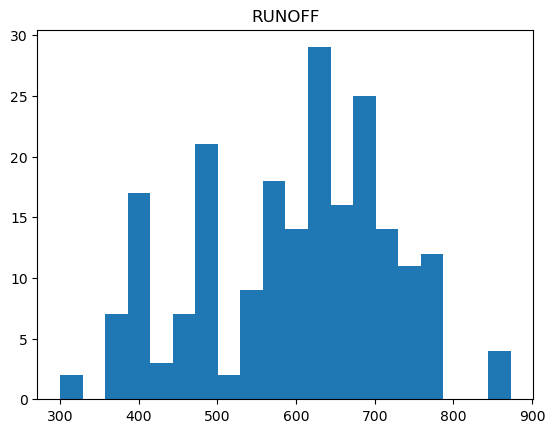

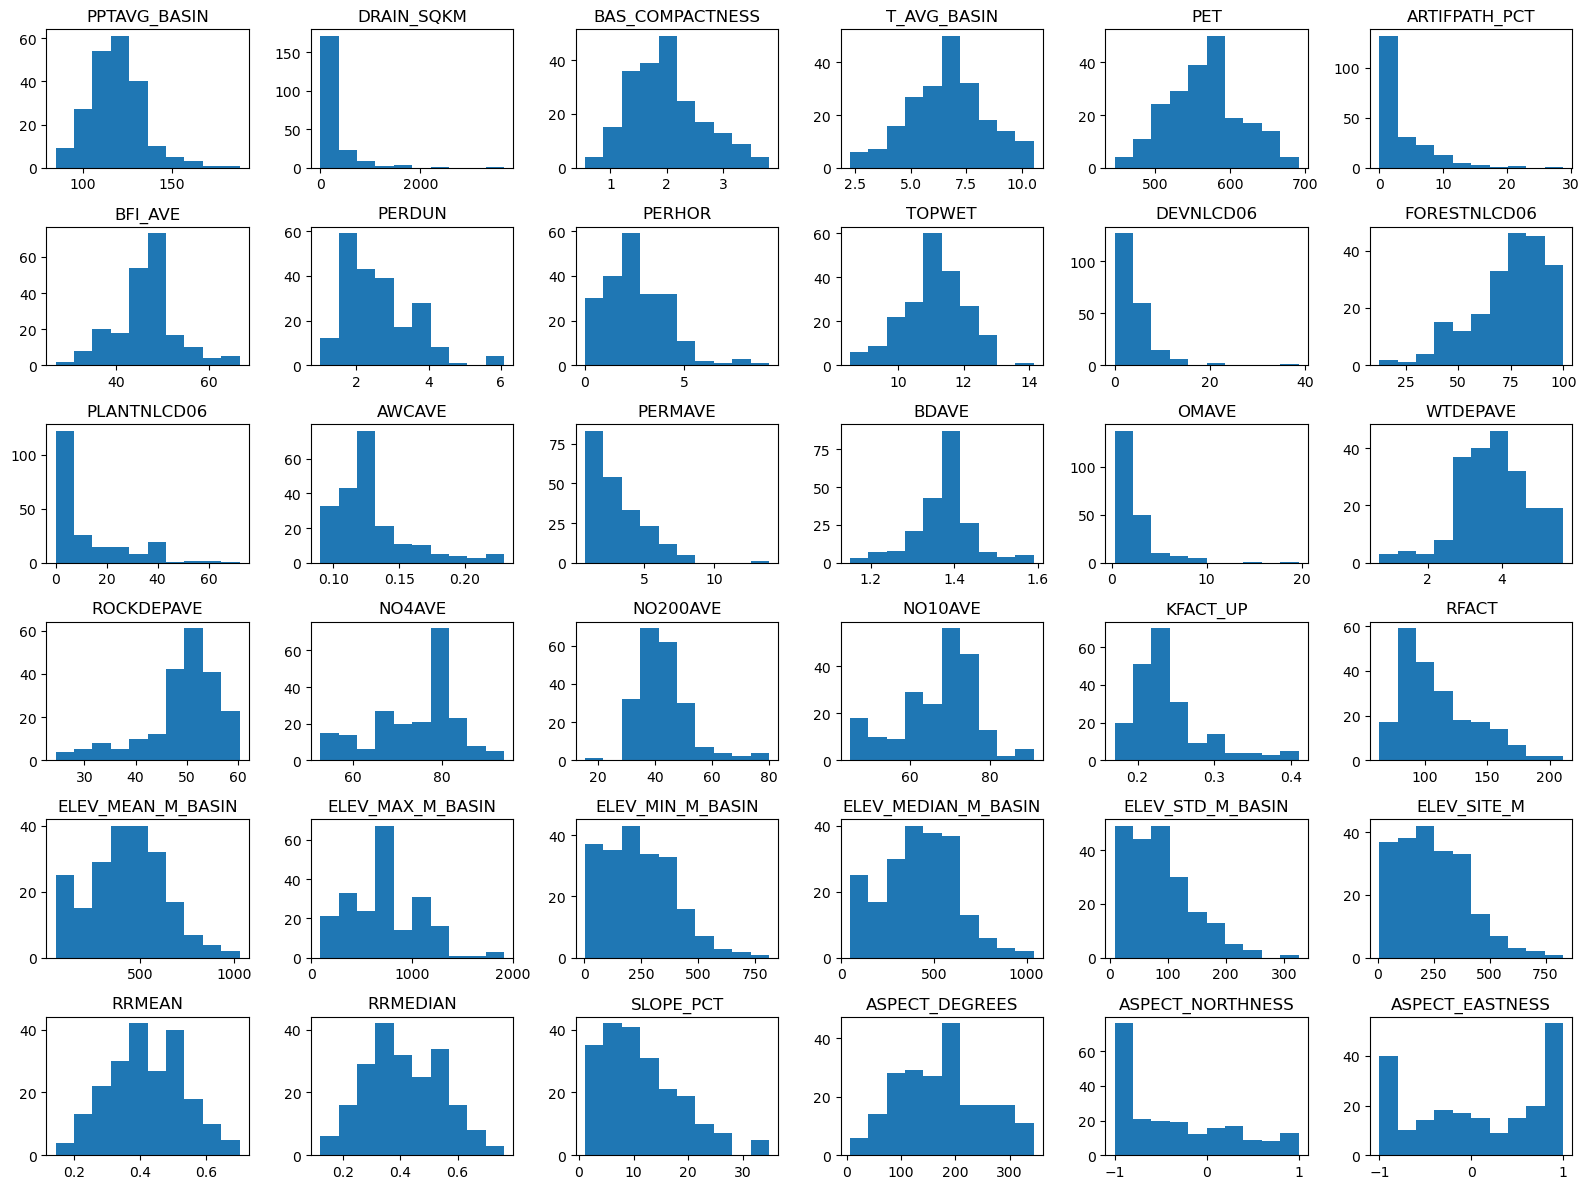

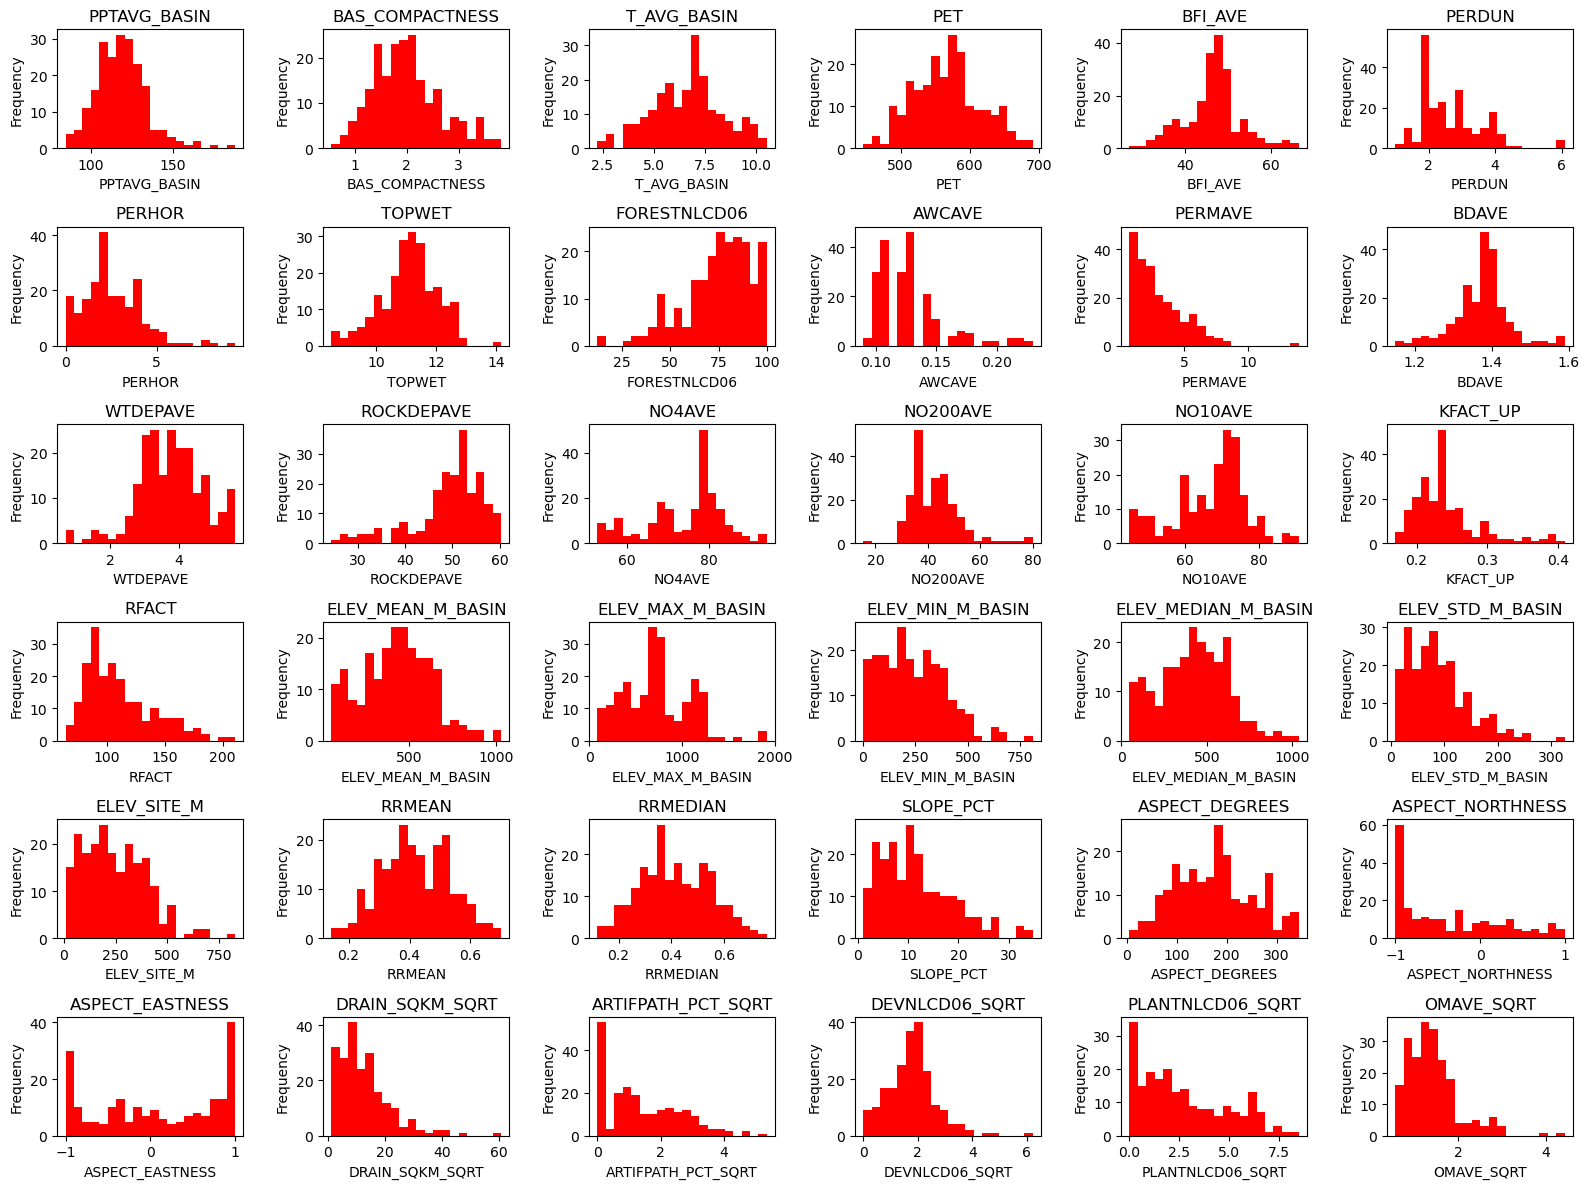

In [28]:
#<code for runoff histogram here>
plt.hist(gages2['RUNOFF'], bins=20)
plt.title(gages2.columns[0])
#code block to plot histograms of all predictors
plt.figure(figsize=(16,12))
for i in np.arange(1,gages2.shape[1]):
    plt.subplot(6,6,i)
    #<code for histogram of each predictor here>
    plt.hist(gages2.iloc[:, i])
    #<code to add title to histogram here>
    plt.title(gages2.columns[i])
plt.tight_layout() 
plt.show()


#<code for transformations and to drop orginial (untransformed) five predictors here>
gages2['DRAIN_SQKM_SQRT'] = np.sqrt(gages2['DRAIN_SQKM'])
gages2['ARTIFPATH_PCT_SQRT'] = np.sqrt(gages2['ARTIFPATH_PCT'])
gages2['DEVNLCD06_SQRT'] = np.sqrt(gages2['DEVNLCD06'])
gages2['PLANTNLCD06_SQRT'] = np.sqrt(gages2['PLANTNLCD06'])
gages2['OMAVE_SQRT'] = np.sqrt(gages2['OMAVE'])

#drop original documents
gages2 = gages2.drop(columns=['DRAIN_SQKM', 'ARTIFPATH_PCT', 'DEVNLCD06', 'PLANTNLCD06', 'OMAVE'])

#remake the histograms to see if the transformation worked print('Histograms after transformation of skewed variables') 
plt.figure(figsize=(16,12)) 
for i in np.arange(1,gages2.shape[1]): 
    plt.subplot(6,6,i) 
    plt.hist(gages2.iloc[:,i],bins=20, color = 'red') 
    plt.xlabel(gages2.columns[i]) 
    plt.ylabel('Frequency') 
    plt.title(gages2.columns[i]) 
plt.tight_layout() 
plt.show() 




Observations from the Histograms:

- Runoff appears to follow an approximately normal distribution, showing minimal skewness.

- The most strongly skewed variables are: DRAIN_SQKM, ARTIFPATH_PCT, PLANTNLCD06, OMAVE, and DEVNLCD06. Each of these variables shows a right-skewed pattern.

- After applying a square root transformation, the distributions of these variables become much closer to a normal (symmetric) shape, indicating that the transformation successfully reduced skewness.

3. **(1 pt)** Using the data in gages2 and ols from the statsmodels library, fit a linear regression of runoff versus all the other predictors. **Evaluate whether some key assumptions of the linear regression model are violated by creating two figures in a 2-panel plot, one using a q-q plot to evaluate the normality of the regression residuals, and another plotting the regression residuals against the model's fitted values. Be sure to label all axes. Provide an interpretation of these figures, both in terms of which assumptions are violated (if any), and the implications of any violations in terms of model use.** 

   Note: I've included some starter code that creates a formula that you can use in the ols function. This approach lets you create a really long formula with all predictors included, without having to write it all out maually. 

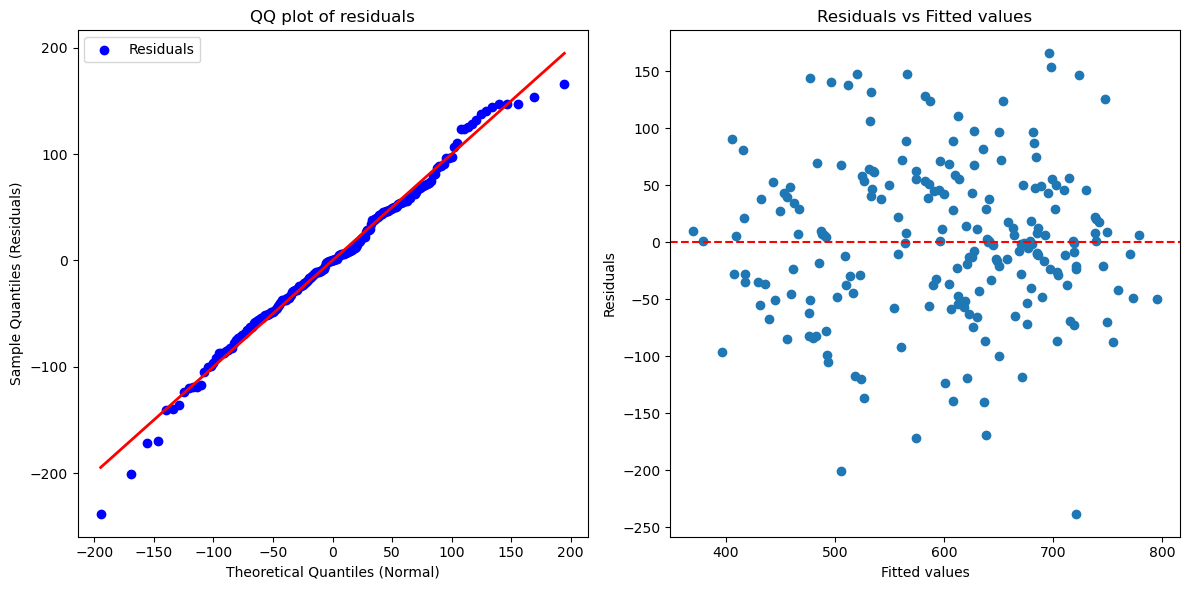

In [29]:
all_predictor_columns = "+".join(gages2.columns[1:])
my_formula = "RUNOFF~" + all_predictor_columns

model = ols(formula=my_formula, data=gages2).fit() 
y_pred = model.fittedvalues 

# Create visualizations to check model assumptions 
plt.figure(figsize=(12, 6)) 

# qq-plot to see if residuals are normally distributed 
plt.subplot(1, 2, 1) 
residuals = model.resid 

# Step 1: Fit a normal distribution to the residuals 

mu, sigma = norm.fit(residuals) 

# Step 2: Sort the residuals 
sorted_residuals = np.sort(residuals) 

# Step 3: Compute the theoretical quantiles from the normal distribution 
n = len(residuals) 
# create equally spaced probabilities (avoiding 0 and 1) 
probabilities = (np.arange(1, n + 1) - 0.5) / n 
theoretical_quantiles = norm.ppf(probabilities, loc=mu, scale=sigma) 

# Step 4: Plot 
plt.scatter (theoretical_quantiles, sorted_residuals, color='blue', label='Residuals')
plt.plot(theoretical_quantiles, theoretical_quantiles, color='red', lw=2) 
label= plt.xlabel('Theoretical Quantiles (Normal)') 
plt.ylabel('Sample Quantiles (Residuals)') 
plt.title('QQ plot of residuals')
plt.legend() 

# residuals vs fitted values to check for homoscedasticity 
plt.subplot(1, 2, 2) 
plt.scatter (y_pred, model.resid) 
plt.axhline(0, color='red', linestyle= '--') 
plt.xlabel('Fitted values') 
plt.ylabel('Residuals') 
plt.title('Residuals vs Fitted values') 
plt.tight_layout() 
plt.show() 




Observations from the Diagnostic Plots:

- The QQ-plot shows that the residuals align closely with the 45-degree line, indicating that they are approximately normally distributed.

- The residuals versus fitted values plot shows no clear pattern, with points appearing randomly and symmetrically distributed around the zero line. This suggests homoscedasticity of the residuals and supports the assumption of a linear relationship between the predictors and the dependent variable.

4. **(1 pt) Report the regression table for the linear regression model from problem #3 and comment on:**
- **The predictors that have a statistically significant relationship to runoff (up to a 10% significance level). Note the sign and significance level of each effect.**
- **The overall significance of the regression (based on the F statistic).** 
- **How the significance of the overall regression (based on the F-test) compares to the significance of the individual predictors (based on the t-tests).** 

    Note: the regression table may get cut off. You can see the whole table by viewing as a scrollable element or opening the table in a text editor (see options at bottom of table). 

In [30]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 RUNOFF   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     9.855
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           1.73e-26
Time:                        20:56:49   Log-Likelihood:                -1192.6
No. Observations:                 211   AIC:                             2459.
Df Residuals:                     174   BIC:                             2583.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -304.5855    

Regression Analysis Summary:

- To assess statistical significance, we set the significance level at α = 0.05 and examined whether the confidence intervals of the coefficients included zero. The variables FORESTNLCD06 and PPTAVG_BASIN were found to be statistically significant, with p-values of 0.008 and 0.015, respectively. Their corresponding confidence intervals are [0.665, 4.408] and [0.512, 4.660], indicating positive relationships with the dependent variable.

- Regarding the overall model significance, the F-statistic has a p-value of 1.73e−26, which is extremely small. This suggests that the regression model as a whole is highly significant.

- However, while the overall regression is significant, most individual predictors are not significant based on their t-tests. This discrepancy may be explained by multicollinearity among the independent variables, as also noted in the regression summary output.

5. **(1 pt)** Here you will explore the correlations across the predictors in gages2. 
- First, calculate the correlations between all predictors (excluding the response variable RUNOFF), and store these correlations in a matrix called corr_matrix. 
- **Then, use plt.imshow to plot the correlation matrix as a heat map. Add a color bar to this heatmap using plt.colorbar, and label the x-ticks and y-ticks with the names of the predictors using plt.xticks and plt.yticks.** 
- **Identify two pairs of predictors with very high correlation. Name the predictors in each pair and report their correlation value (rounded to three decimal places).**   


[[ 1.          0.38761881 -0.17239845 ... -0.15688078 -0.63070409
  -0.11672079]
 [ 0.38761881  1.         -0.15148766 ... -0.16168117 -0.19750535
  -0.40495064]
 [-0.17239845 -0.15148766  1.         ...  0.69753036  0.41154342
  -0.20031896]
 ...
 [-0.15688078 -0.16168117  0.69753036 ...  1.          0.39877506
  -0.01943133]
 [-0.63070409 -0.19750535  0.41154342 ...  0.39877506  1.
  -0.0214781 ]
 [-0.11672079 -0.40495064 -0.20031896 ... -0.01943133 -0.0214781
   1.        ]]


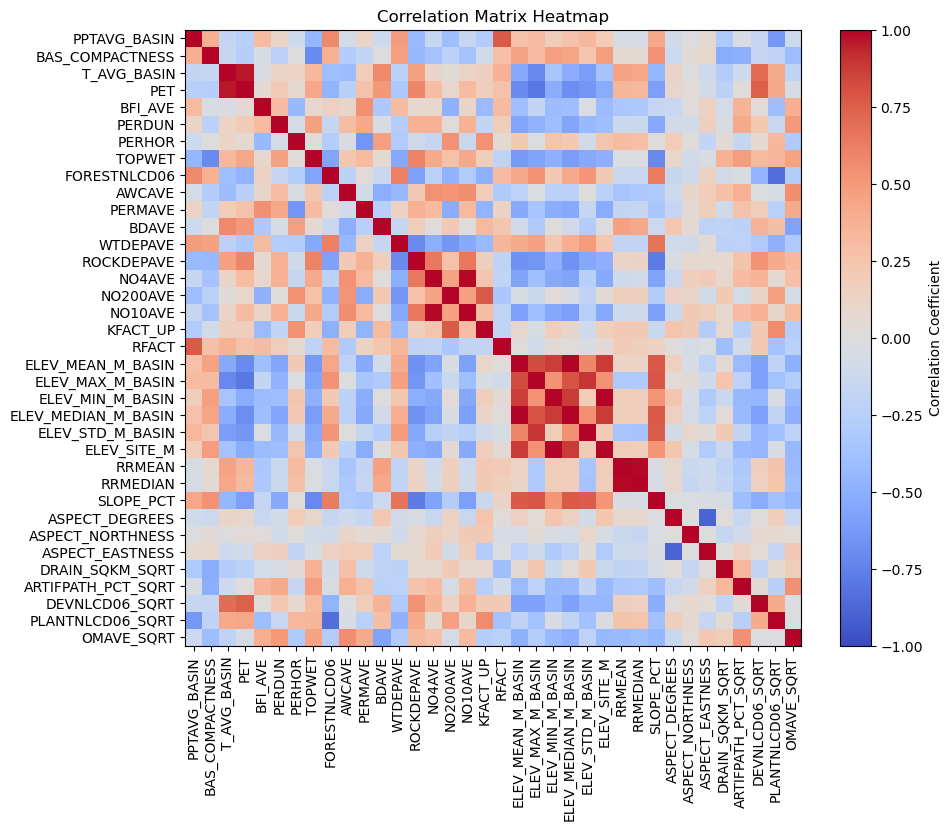

In [31]:
#create a correlation matrix 

#first drop the RUNOFF column 
predictors = gages2.drop(columns=['RUNOFF']) 

#create correlation matrix 
corr_matrix = np.array (predictors.corr()) 
print(corr_matrix) 

#create a heatmap of the correlation matrix 
plt.figure(figsize=(10,8)) 
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1) 
plt.colorbar (label='Correlation Coefficient') 
plt.xticks(ticks=np.arange(len(predictors.columns)), labels=predictors.columns, rotation = 90 )
plt.yticks(ticks=np.arange(len(predictors.columns)), labels=predictors.columns) 
plt.title('Correlation Matrix Heatmap') 
plt.show() 


By looking at the figure, 2 pairs of prediction with very high correlation seem to be : RRMEAN & RRMEDIAN, PET & T_AVG_BASIN

In [32]:
print('Correlation between RRMEAN and RRMEDIAN:', np.round(predictors.corr().loc['RRMEAN', 'RRMEDIAN'], 3))
print('Correlation between T_AVG_BASIN and PET:', np.round(predictors.corr().loc['T_AVG_BASIN', 'PET'], 3))

Correlation between RRMEAN and RRMEDIAN: 0.99
Correlation between T_AVG_BASIN and PET: 0.965


6. **(1 pt) Report the Pearson correlation between the following two predictors: average basin temperature (T_AVG_BASIN) and average basin potential evapotranspiration (PET). Round this correlation to three decimal places.** 

    Then, using non-parametric bootstrapping with B=1000 bootstrap samples, re-fit the linear regression model from problems #3-#4 above to each bootstrapped sample, and develop B=1000 bootstrapped regression coefficient estimates for average basin temperature (T_AVG_BASIN) and average basin potential evapotranspiration (PET). 
    
    **Finally, create a scatter plot of the 1000 bootstrap coefficient estimates for T_AVG_BASIN vs. PET. Add to this plot a red point for the original coefficient estimates for these two predictors from the linear model estimated on the original data (see problems #3-#4). What do these results suggest about your coefficient estimates for these two predictors in the linear regression?**

Pearson correlation between T_AVG_BASIN and PET:  0.965


/var/folders/07/x3tw6f7d02b9sg78zrz3df7r0000gn/T/ipykernel_40213/685924066.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


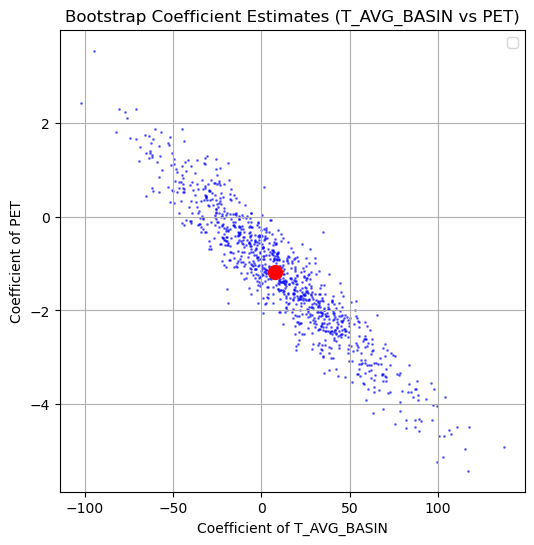

In [33]:
#calculate pearson correlation between T_AVG_BASIN and PET 
pearson = np.round(pearsonr (predictors ['T_AVG_BASIN'], predictors['PET']),3) 
print('Pearson correlation between T_AVG_BASIN and PET: ', pearson[0]) 

#Create 1000 bootstrap samples from our dataset 
B = 1000 
n = len(gages2) 
coefficients = np.zeros((B,2)) 
for i in range(B):  
    sample = gages2.sample (n, replace=True) 
    # fit the model to the bootstrap sample 
    model_boot = ols (formula=my_formula, data=sample).fit() 
    # store the coefficients for T_AVG_BASIN and PET 
    coefficients[i, 0] = model_boot.params['T_AVG_BASIN'] 
    coefficients [i, 1] = model_boot.params['PET'] 

# create visualization of bootstrap coefficient estimates 
plt.figure(figsize=(6,6)) 
plt.scatter(coefficients[:, 0], coefficients[:, 1], color='blue', alpha=0.5, s=1) 
# add original coefficient estimate 
plt.scatter(model.params['T_AVG_BASIN'], model.params['PET'], color='red', s=100)
plt.xlabel('Coefficient of T_AVG_BASIN') 
plt.ylabel('Coefficient of PET') 
plt.title('Bootstrap Coefficient Estimates (T_AVG_BASIN vs PET)') 
plt.legend() 
plt.grid(True) 
plt.show() 


The figure reveals a wide spread of coefficient estimates across the bootstrap samples. Notably, as the coefficient of PET increases, the coefficient of T_AVG_BASIN tends to decrease, and vice versa. This negative relationship suggests that the estimated coefficients are strongly dependent on the specific sample used.

Such variability indicates that the model coefficients are unstable, meaning they cannot be relied upon for robust inference. In other words, the effects of the predictors vary considerably across different resamples of the data, implying high sensitivity of the model to sampling variation.

7. **(1 pt)** Calculate the variance inflation factor (VIF) for each predictor. To make things easy, you can import variance_inflation_factor from statsmodels.stats.outliers_influence (see code block below). Then, you can follow the steps below:
- remove 'RUNOFF' from the gages2 data and store the result in a temporary matrix X
- loop over the columns of X (i.e., each of the predictors)
- use the function variance_inflation_factor() to calculate the VIF for each predictor and store it in an array
- after the loop is completed, convert the array of VIF values into a data frame, with another column to store the predictor names, and then sort the data frame by VIF values

    **Report the sorted VIF values. Based on these results, do you think the p-values for the t-tests of the regression model from problem #4 above accurately reflect, underestimate, or overestimate the significance of certain predictors? Explain why.** 


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = np.array(predictors) 
vif = np.zeros((X.shape[1],1)) 

#calculate VIF for each predictor 
for column in range(X.shape[1]): 
    vif_predictor = variance_inflation_factor (X, column) 
    vif[column] = vif_predictor 

#convert to dataframe 
vif = pd.DataFrame (vif, index=predictors.columns, columns=['VIF']) 
#sort by VIF value 
vif = vif.sort_values (by='VIF', ascending=False) 
print(vif) 


                              VIF
ELEV_MEAN_M_BASIN    19065.038152
ELEV_MEDIAN_M_BASIN  12283.051486
NO4AVE                7838.919779
NO10AVE               6726.818369
PET                   6175.049173
RRMEAN                4015.182223
RRMEDIAN              2805.096027
ELEV_MIN_M_BASIN      1871.379695
BDAVE                 1662.018421
ELEV_SITE_M           1555.511257
T_AVG_BASIN           1027.872302
TOPWET                 678.811539
PPTAVG_BASIN           560.082184
ELEV_MAX_M_BASIN       478.696544
ROCKDEPAVE             318.375151
NO200AVE               301.810973
AWCAVE                 243.099086
BFI_AVE                178.090766
RFACT                  176.660656
KFACT_UP               173.621118
FORESTNLCD06           164.563739
WTDEPAVE               112.981803
ELEV_STD_M_BASIN        97.620338
SLOPE_PCT               42.657462
OMAVE_SQRT              36.991618
BAS_COMPACTNESS         36.443879
ASPECT_DEGREES          34.491877
PERDUN                  31.920714
PERMAVE       

The Variance Inflation Factor (VIF) values are very high for most predictors, indicating the presence of strong multicollinearity. Generally, a VIF greater than 10 suggests that an explanatory variable is highly correlated with other predictors. This results in inflated standard errors for the corresponding regression coefficients.

Due to these large standard errors, the t-tests and their associated p-values become unreliable, often leading to an underestimation of the predictors’ true importance. This issue affects nearly all variables in the model, with the exception of DRAIN_SQKM_sqrt, ARTIFPATH_PCT_sqrt, ASPECT_EASTNESS, and ASPECT_NORTHNESS, which exhibit acceptable VIF values.

8. **(1 pt)** You will now fit ridge and lasso regressions to the data using functions available through scikit-learn using the following steps below. Note, it may also help to refer the Data Camp exercises on fitting ridge and lasso regressions: 

- First, import the following modules:
  - from sklearn.linear_model import LinearRegression, Ridge, Lasso
  - from sklearn.preprocessing import StandardScaler
  - from sklearn.model_selection import KFold, train_test_split, GridSearchCV

- Next, create a matrix (X) composed only of the predictors, and an array y that contains only the dependent variable RUONFF. Recall from the Data Camp exercise that in scikit-learn, y needs to have 2 dimensions (n rows and 1 column), so we need to reshape the 1-D array y using y = y.reshape(-1,1). 
  - Note: *do not* separate your data into training and testing sets for this problem. 

- Then, use the StandardScaler to center each column of X and y by its mean value and divide by its standard deviation. This puts all variables on the same scale (approximately between -3 and 3), which improves estimation of hyperparameters (like the penalty for ridge and lasso). 

- Create a dictionary of alpha values (i.e., the penalty parameter) for ridge and lasso regression. Note that scikit-learn refers to the penalty parameter as alpha, while in class, we have referred to this parameter as lambda. Also note that ridge and lasso can require very different penalty values, because ridge constrains the *squared* Euclidean distance and lasso constraints the Manhattan distance of the beta vector. Therefore, it is useful to create a dictionary with alpha values that range across several orders of magnitude as follows: param_grid = {'alpha':10**np.linspace(-4,2,100)}  

- Use KFold and GridSearchCV to search for optimal alpha values for both ridge and lasso regressions over 10 folds of data across the training set. 
  - Refer to the Data Camp exercises for guidance on how to do this. 
  - When using GridSearchCV, call the cross-validated ridge and lasso model objects ridge_cv and lasso_cv. 
  - Note that sometimes the lasso model will report a warning that the optimization has not converged. This warning usually can be ignored without concern (the solution reported is usually very close to optimal), but it can also be addressed by increasing the number of iterations allowed in the optimization. 

- **Report the best alpha values and cross-validated $R^{2}$ score for both the ridge and lasso regressions (rounded to three decimal places).** 
  - These quantitites can be found in the .best_params_ and .best_score_ attributes of the fitted cross-validated models (i.e., ridge_cv and lasso_cv).

- **Create 2 figures showing how the cross-validated $R^{2}$ scores vary with alpha values for both ridge and lasso regressions.**
  - Put the x-axis on a log scale, because the alpha values range across several orders of magnitude.
  - Note that the mean of the cross-validated $R^{2}$ scores across left-out folds is available in the fitted ridge_cv and lasso_cv objects as ridge_cv.cv_results_['mean_test_score'] and lasso_cv.cv_results_['mean_test_score']. 

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e-01, tolerance: 1.925e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.039e-01, tolerance: 1.945e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.752e-01, toler

Best alpha for Ridge Regression: 43.288
Best alpha for Lasso Regression: 0.031
Best R^2 score for Ridge Regression: 0.519
Best R^2 score for Lasso Regression: 0.503


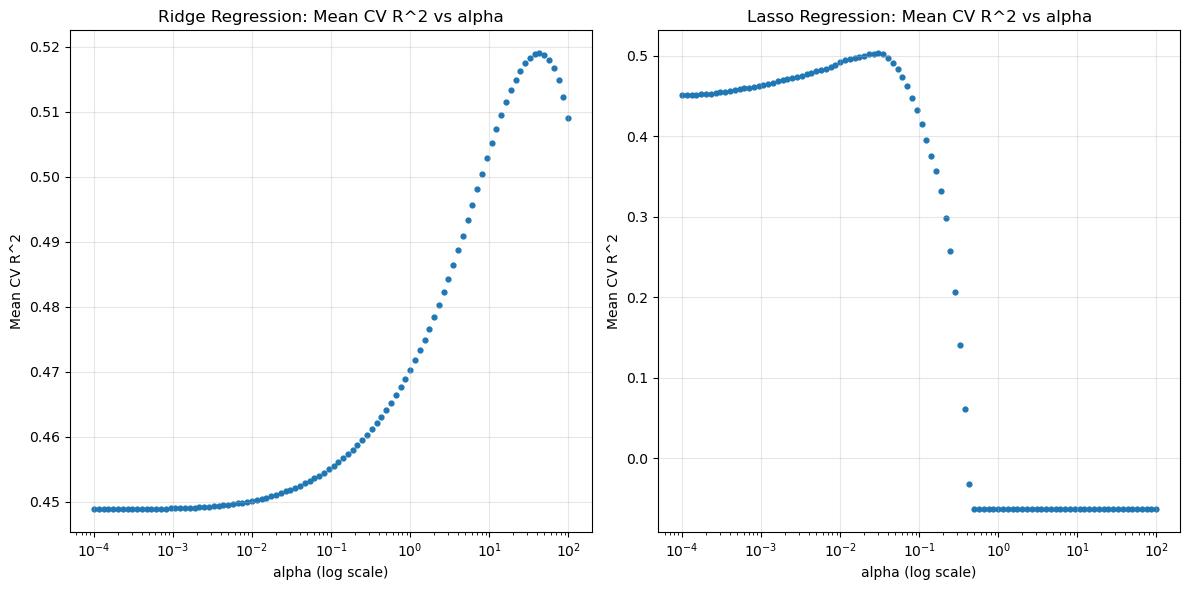

Exception ignored in: <function ResourceTracker.__del__ at 0x106e1a0c0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10700a0c0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104ef20c0>
Traceback (most recent call last

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV

# 2) Build X (predictors) and y (response)
#    - assumes you already have a DataFrame `gages2`
#    - and a DataFrame `predictors` = gages2.drop(columns=['RUNOFF'])
X = predictors.values
y = gages2['RUNOFF'].values.reshape(-1, 1)  # y must be 2D for StandardScaler

# 3) Standardize X and y (center + scale)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y).ravel()  # ravel() to make y 1D for sklearn estimators

# 4) Alpha grid (log-spaced over several orders of magnitude)
alphas = 10 ** np.linspace(-4, 2, 100)  # 1e-4 … 1e+2
param_grid = {'alpha': alphas}

# 5) KFold CV
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# 6) GridSearchCV for Ridge and Lasso (optimize R²)
ridge = Ridge()
lasso = Lasso(max_iter=10000, random_state=1)

ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1)
lasso_cv = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1)

ridge_cv.fit(X_scaled, y_scaled)
lasso_cv.fit(X_scaled, y_scaled)

# 7) Report best alpha and best cross-validated R² (rounded to 3 decimals)
print(f"Best alpha for Ridge Regression: {ridge_cv.best_params_['alpha']:.3f}")
print(f"Best alpha for Lasso Regression: {lasso_cv.best_params_['alpha']:.3f}")
print(f"Best R^2 score for Ridge Regression: {ridge_cv.best_score_:.3f}")
print(f"Best R^2 score for Lasso Regression: {lasso_cv.best_score_:.3f}")

# 8) Plot mean CV R² vs alpha (log x-axis), one figure with two subplots
ridge_mean_r2 = ridge_cv.cv_results_['mean_test_score']
lasso_mean_r2 = lasso_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 6))

# Ridge
plt.subplot(1, 2, 1)
plt.scatter(alphas, ridge_mean_r2, s=12)
plt.xscale('log')  # put x-axis on a log scale
plt.xlabel('alpha (log scale)')
plt.ylabel('Mean CV R^2')
plt.title('Ridge Regression: Mean CV R^2 vs alpha')
plt.grid(True, alpha=0.3)

# Lasso
plt.subplot(1, 2, 2)
plt.scatter(alphas, lasso_mean_r2, s=12)
plt.xscale('log')  # put x-axis on a log scale
plt.xlabel('alpha (log scale)')
plt.ylabel('Mean CV R^2')
plt.title('Lasso Regression: Mean CV R^2 vs alpha')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

9. **(1 pt)** Fit a final ridge and lasso model to all of the data using the selected alpha values from problem #8 above. Also fit a standard linear regression model to these data using OLS (with the LinearRegression module in sklearn). Organize the fitted regression coefficients for the OLS, ridge, and lasso regressions into a data frame, being sure to label the rows of the data frame with the predictor names. 

    **Print the data frame with coefficient values for the OLS, ridge, and lasso regressions. In general,how do the absolute magnitudes of the coefficients from OLS, ridge, and lasso models compare to each other?** 


                     Linear Coef  Ridge Coef  Lasso Coef
Predictor                                               
PPTAVG_BASIN            0.335211    0.207991    0.320825
BAS_COMPACTNESS        -0.067940   -0.060712   -0.068611
T_AVG_BASIN             0.106501   -0.114507   -0.139992
PET                    -0.478903   -0.117781   -0.000000
BFI_AVE                 0.116377    0.088886    0.120088
PERDUN                  0.066876    0.080298    0.087269
PERHOR                 -0.095686   -0.066940   -0.026760
TOPWET                  0.162014    0.105518    0.141079
FORESTNLCD06            0.371163    0.161991    0.183646
AWCAVE                  0.066741    0.042804    0.000000
PERMAVE                 0.085821    0.073986    0.045401
BDAVE                   0.103504    0.043669    0.000000
WTDEPAVE                0.077557    0.005156   -0.000000
ROCKDEPAVE              0.198665    0.096422    0.073930
NO4AVE                  0.076165    0.167822    0.373961
NO200AVE                0.13343

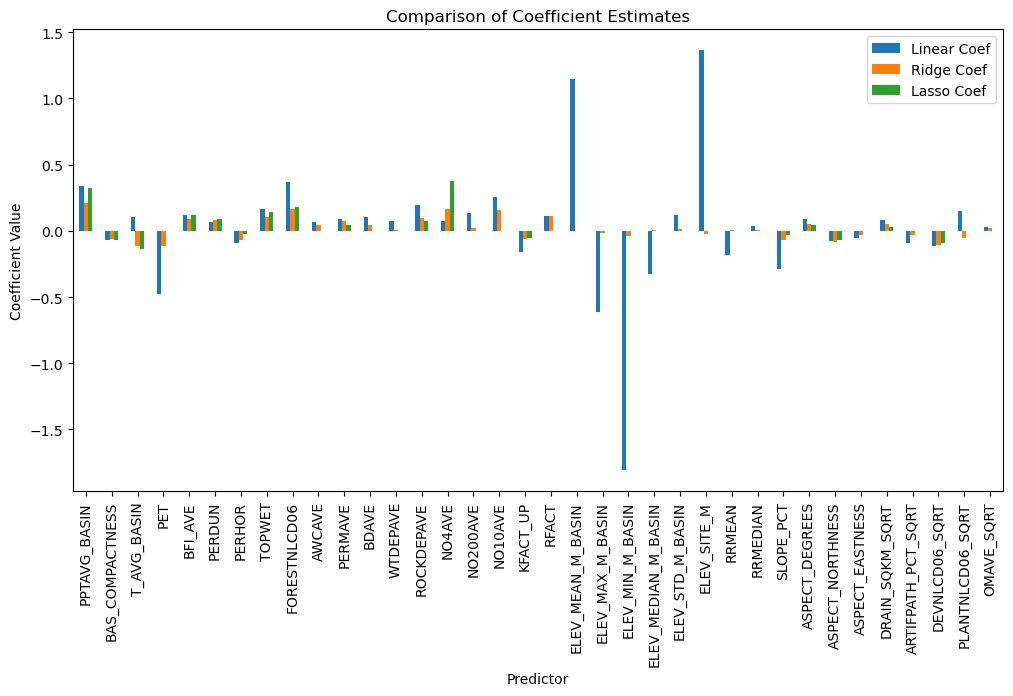

In [ ]:
#fit final models with best alpha values 
ridge_final = Ridge (alpha=ridge_cv.best_params_['alpha']) 
lasso_final = Lasso (alpha=lasso_cv.best_params_['alpha']) 
ridge_final.fit(X_scaled, y_scaled) 
lasso_final.fit(X_scaled, y_scaled) 

#also fit a standard linear regression model for comparison 
linear_final = LinearRegression() 
linear_final.fit(X_scaled, y_scaled) 

#create a dataframe for coefficient values 
coeff_df = pd.DataFrame({ 
    'Predictor': predictors.columns, 
    'Linear Coef': linear_final.coef_.flatten(), 'Ridge Coef': ridge_final.coef_.flatten(), 
    'Lasso Coef': lasso_final.coef_.flatten() 
})
coeff_df = coeff_df.set_index('Predictor') 
print(coeff_df) 

#create a bar plot to compare coefficient estimates 
coeff_df.plot(kind='bar', figsize=(12,6)) 
plt.title('Comparison of Coefficient Estimates') 
plt.ylabel('Coefficient Value') 
plt.show() 


The OLS model produces the largest coefficient magnitudes, as it applies no regularization. Ridge regression shrinks coefficients toward zero but keeps all predictors in the model, leading to more stable estimates. Lasso regression, on the other hand, sets many coefficients exactly to zero, effectively selecting only the most important predictors. In some cases, coefficients change sign between models, showing that predictor effects are sensitive to the type of regularization applied.

10.	**(1 pt)** You will now test which of these regression approaches provides the best out-of-sample predictions in 10 random train-test splits, using the following steps:

- Create three empty numpy arrays that will hold the $R^{2}$ values for OLS, ridge, and lasso regression in each of the 10 train-test splits.  

- Start a for-loop that will loop through each of the 10 random train-test splits

- use train_test_split to create training and testing data for both X (the predictor matrix) and y (the dependent variable, RUNOFF). In train_test_split, set shuffle=True and set random_state equal to the incrementer of the for-loop. Remember to reshape both y_train and y_test as in problem #8

- fit a standard scaler to the training data for both X and y, and then standardized both the training and testing data

- Use K-fold cross validation (with 5 folds) on the training data to select penalty parameters for both ridge and lasso regression

- Fit final OLS, ridge, and lasso regression models to the training data

- store the $R^{2}$ values on the *testing* data for each of these three models for the current train-test split in the empty numpy arrays created before the for-loop

  **After the for-loop is complete, you will have three arrays with 10 out-of-sample $R^{2}$ values for each of the three models. Create a boxplot of these $R^{2}$ values. Be sure to label your figure. Comment on how the out-of-sample prediction error differs across the three models?**




Mean R^2 (±SD) over 10 splits
OLS   : 0.457 ± 0.115
Ridge : 0.576 ± 0.058
Lasso : 0.551 ± 0.054


/var/folders/07/x3tw6f7d02b9sg78zrz3df7r0000gn/T/ipykernel_40213/3869275709.py:58: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([r2_ols, r2_ridge, r2_lasso], labels=['OLS', 'Ridge', 'Lasso'])


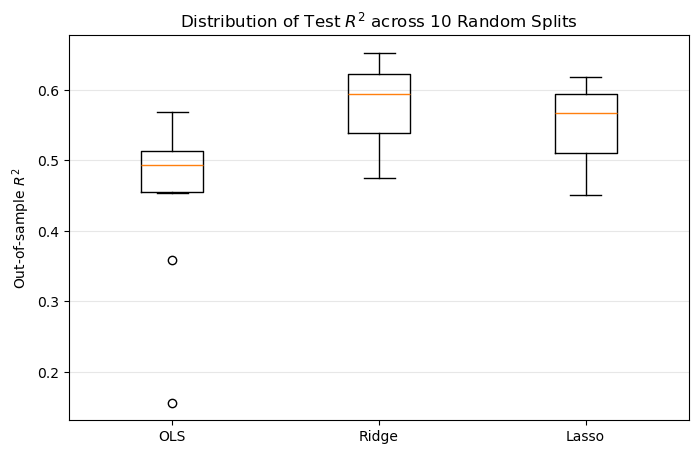

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import warnings

# quiet down lasso convergence chatter
warnings.filterwarnings("ignore", category=ConvergenceWarning)

n_splits = 10
alphas = 10 ** np.linspace(-4, 2, 100)           
param_grid = {'alpha': alphas}

r2_ols   = np.zeros(n_splits)
r2_ridge = np.zeros(n_splits)
r2_lasso = np.zeros(n_splits)

for i in range(n_splits):
    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=i)

    # scale using train-only fit
    xsc = StandardScaler()
    ysc = StandardScaler()
    X_train_s = xsc.fit_transform(X_train)
    X_test_s  = xsc.transform(X_test)
    y_train_s = ysc.fit_transform(y_train).ravel()
    y_test_s  = ysc.transform(y_test).ravel()

    # CV on training data to choose alpha (5-fold)
    kf = KFold(n_splits=5, shuffle=True, random_state=i)

    ridge = Ridge()
    lasso = Lasso(max_iter=10000, random_state=1)

    ridge_cv = GridSearchCV(ridge, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=1)
    lasso_cv = GridSearchCV(lasso, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=1)

    ridge_cv.fit(X_train_s, y_train_s)
    lasso_cv.fit(X_train_s, y_train_s)

    # fit final models with best alphas on training data
    ols_final   = LinearRegression().fit(X_train_s, y_train_s)
    ridge_final = Ridge(alpha=ridge_cv.best_params_['alpha']).fit(X_train_s, y_train_s)
    lasso_final = Lasso(alpha=lasso_cv.best_params_['alpha'], max_iter=10000, random_state=1).fit(X_train_s, y_train_s)

    # store out-of-sample R^2 (on scaled y)
    r2_ols[i]   = ols_final.score(X_test_s, y_test_s)
    r2_ridge[i] = ridge_final.score(X_test_s, y_test_s)
    r2_lasso[i] = lasso_final.score(X_test_s, y_test_s)


print(f"Mean R^2 (±SD) over {n_splits} splits")
print(f"OLS   : {r2_ols.mean():.3f} ± {r2_ols.std():.3f}")
print(f"Ridge : {r2_ridge.mean():.3f} ± {r2_ridge.std():.3f}")
print(f"Lasso : {r2_lasso.mean():.3f} ± {r2_lasso.std():.3f}")

# boxplot of out-of-sample R^2
plt.figure(figsize=(8, 5))
plt.boxplot([r2_ols, r2_ridge, r2_lasso], labels=['OLS', 'Ridge', 'Lasso'])
plt.ylabel('Out-of-sample $R^2$')
plt.title('Distribution of Test $R^2$ across 10 Random Splits')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

The OLS model shows the lowest median performance across the 10 splits, while Ridge performs best overall. Lasso falls in between, showing moderate improvement over OLS. In terms of spread, Ridge tends to have slightly higher variability but generally higher 
R^2 values, suggesting more consistent predictive strength. Lasso shows a wider box with an outlier, indicating more fluctuation in performance. Overall, Ridge regression appears to be the most reliable model for out-of-sample prediction based on the median 
R^2 values.

11. **(1 pt)** Read the Dormann et al. (2013) article on a comparison of methods for multicollinearity. The article can be found on Canvas under the Assignment 3 folder. In one or two lines, please describe how the lasso and ridge regression approaches compared to other methods, in terms of their out-of-sample prediction skill.  

Both Lasso and Ridge regression perform robustly under high multicollinearity, showing relatively stable out-of-sample prediction errors (low RMSE) compared to other methods. However, when the correlation structure in new data differs from the training data, their predictive accuracy declines noticeably.

I used ChatGPT (OpenAI, 2025) in support of my solutions to problems 8 and 10 on this assignment.
OpenAI. (2025). ChatGPT (August 28 version) [Large language model]. https://chat.openai.com